# <font color='cyan'> Régression linéaire à 2 features

In [64]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#fonction pour avoir un backfround de figure noir
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Dataset

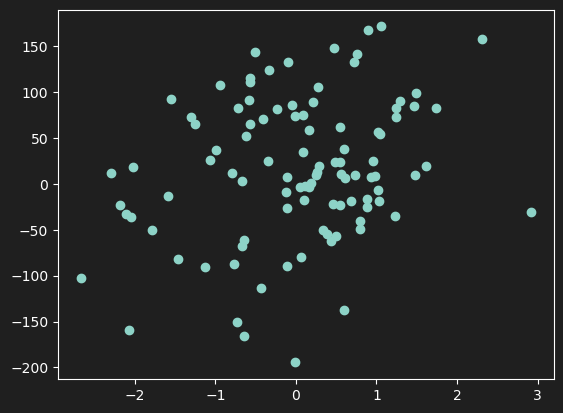

In [67]:
x,y = make_regression(n_samples=100, n_features=2, noise = 10)
plt.scatter(x[:,0], y) # affiche y en fonction de la première feature.

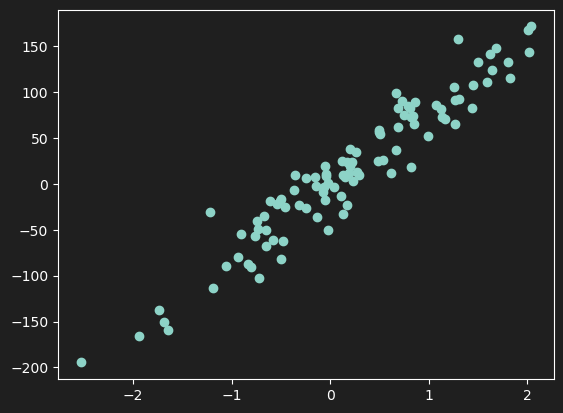

In [68]:
plt.scatter(x[:,1], y)

In [69]:
print(x.shape)
# On reshape y car par défaut, y est de dim "100, ". Il faut donc preciser qu'il n'y a qu'une seule colonne.
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [70]:
# On creer notre matrice X avec la fonction hstack qui permet de "coller" deux vecteurs et ainsi de faire une matrice.
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.03322927 -0.61531768  1.        ]
 [ 0.33632765 -0.65179183  1.        ]
 [ 0.27359665  1.26028344  1.        ]
 [-1.55291909  1.30484009  1.        ]
 [ 1.61085232 -0.05209511  1.        ]
 [ 0.88381924 -0.49645723  1.        ]
 [-2.67459685 -0.72530097  1.        ]
 [ 1.28846833  0.72917988  1.        ]
 [ 0.49248574 -0.76440579  1.        ]
 [ 0.79822785 -0.73677356  1.        ]]


In [71]:
theta = np.random.randn(3,1)
theta.shape
theta

array([[-0.30040313],
       [-0.86368139],
       [-1.25305772]])

# 2. Modèle

In [73]:
def model(X,theta):
    return X.dot(theta) # effectu le produit matricielle de X et theta.

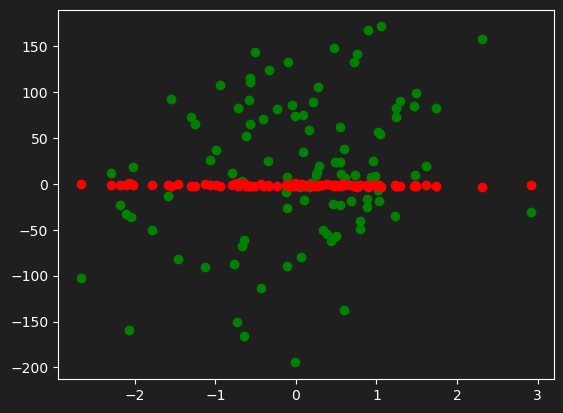

In [74]:
plt.scatter(x[:,0],y, c ='g')
plt.scatter(x[:,0], model(X,theta), c = 'r') # On affiche notre modèle par rapport à notre dataset.

# 3. Fonction coût

In [77]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)- y)**2)

In [78]:
cost_function(X,y,theta) # rappel : on veut que le coût soit le plus proche de zero possible.

3181.111834530527

# 4. Gradient et descente de gradient

In [80]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [81]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# 5. Resultat de la regression linéaire

In [83]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [84]:
theta_final

array([[18.89793107],
       [78.64218114],
       [-0.75145208]])

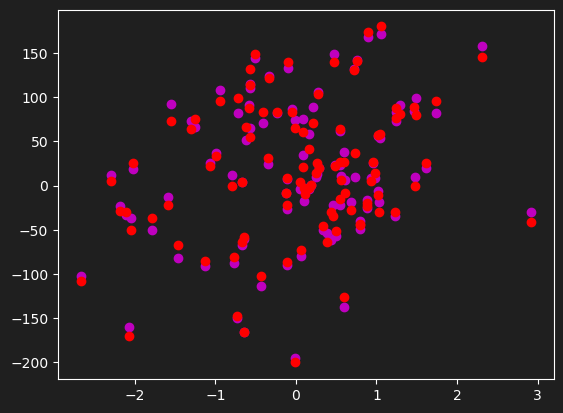

In [88]:
prediction = model(X, theta_final)
plt.scatter(x[:,0],y, c = 'm')
plt.scatter(x[:,0], prediction, c = 'r')

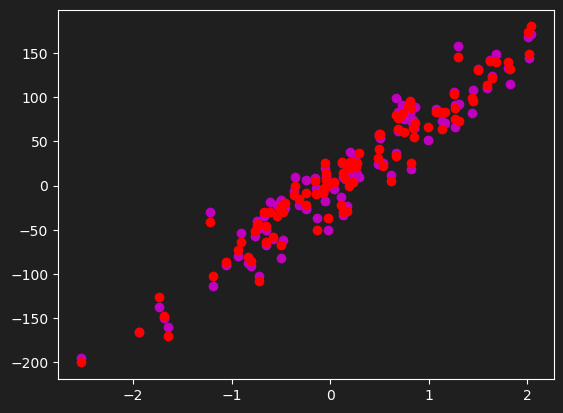

In [96]:
prediction = model(X, theta_final)
plt.scatter(x[:,1],y, c = 'm')
plt.scatter(x[:,1], prediction, c = 'r')

### On remarque que le modèle n'est pas encore tres fiable. Soit on augmente le nombre d'itérations, soit on augmente le learning rate pour converger plus rapidement. Attention cependant à ne pas trop l'augmenter.

# 6. Apprentissage de la machine

### On va regarder comment evolue notre model au fil des itération et ainsi savoir le nombre d'itération necessaire pour un valeur du learning_rate donnée.

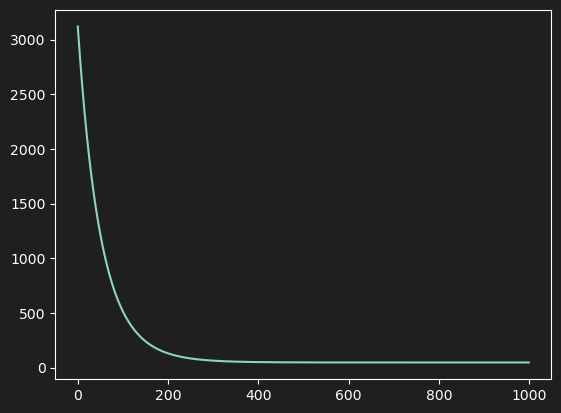

In [102]:
plt.plot(range(1000), cost_history)

# 7. Coefficient de détermination du modèle

In [103]:
def coef_determination(y, prediction):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [105]:
coef_determination(y, prediction)

0.9840087917816657

### Notre coef compris entre 0.85 et 1 donc on a un model qui déja moins bon que lorsque l'on avait qu'une seule feature.

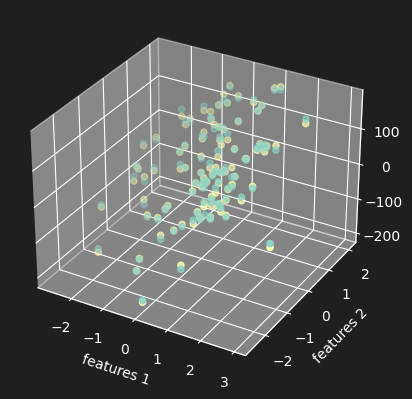

In [110]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)

ax.set_xlabel('features 1')
ax.set_ylabel('features 2')
ax.set_zlabel('y')

plt.show()